# Trying to Load Kaggle datasets into Memory

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import datetime
%precision 4

'%.4f'

In [4]:
JSON_COLUMNS = JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
#JSON_COLUMNS = JSON_COLUMNS = ['geoNetwork', 'totals', 'trafficSource']

# Load the entire csv to memory

In [5]:
df = pd.read_csv('./garev/datasets/train_v2.csv',converters={column: json.loads for column in JSON_COLUMNS}, dtype={'fullVisitorId': 'str'})

In [13]:
del df

In [6]:
df.shape

(1708337, 13)

In [6]:
df.columns

Index(['channelGrouping', 'customDimensions', 'date', 'device',
       'fullVisitorId', 'geoNetwork', 'hits', 'socialEngagementType', 'totals',
       'trafficSource', 'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

In [7]:
df.device[0]

'{"browser": "Firefox", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [12]:
df.hits[0]

"[{'hitNumber': '1', 'time': '0', 'hour': '17', 'minute': '0', 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.co.uk/search?q=water+bottle&ie=utf-8&num=100&oe=utf-8&hl=en&gl=GB&uule=w+CAIQIFISCamRx0IRO1oCEXoliDJDoPjE&glp=1&gws_rd=cr&fg=1', 'page': {'pagePath': '/google+redesign/bags/water+bottles+and+tumblers', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle': 'Water Bottles & Tumblers | Drinkware | Google Merchandise Store', 'pagePathLevel1': '/google+redesign/', 'pagePathLevel2': '/bags/', 'pagePathLevel3': '/water+bottles+and+tumblers', 'pagePathLevel4': ''}, 'transaction': {'currencyCode': 'USD'}, 'item': {'currencyCode': 'USD'}, 'appInfo': {'screenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tumblers', 'landingScreenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tumblers', 'exitScreenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tum

In [9]:
df.shape

for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

df.shape

(1708337, 60)

In [10]:
df.isnull().sum()

channelGrouping                                            0
customDimensions                                           0
date                                                       0
fullVisitorId                                              0
hits                                                       0
socialEngagementType                                       0
visitId                                                    0
visitNumber                                                0
visitStartTime                                             0
device.browser                                             0
device.browserSize                                         0
device.browserVersion                                      0
device.deviceCategory                                      0
device.flashVersion                                        0
device.isMobile                                            0
device.language                                            0
device.mobileDeviceBrand

In [ ]:
totals.bounces                                        836759
totals.hits                                                0
totals.newVisits                                      400907
totals.pageviews                                         239
totals.sessionQualityDim                              835274
totals.timeOnSite                                     874294
totals.totalTransactionRevenue                       1689823
totals.transactionRevenue                            1689823
totals.transactions                                  1689778
totals.visits                                              0

In [13]:
cols_to_drop=["customDimensions",
"hits",
"totals.visits",
"socialEngagementType",
"device.browserSize",
"device.browserVersion",
"device.flashVersion",
"device.isMobile",
"device.language",
"device.mobileDeviceBranding",
"device.mobileDeviceInfo",
"device.mobileDeviceMarketingName",
"device.mobileDeviceModel",
"device.mobileInputSelector",
"device.operatingSystemVersion",
"device.screenColors",
"device.screenResolution",
"geoNetwork.cityId",
"geoNetwork.latitude",
"geoNetwork.longitude",
"geoNetwork.networkLocation",
"trafficSource.adwordsClickInfo.criteriaParameters",
"trafficSource.adwordsClickInfo.page",                  
"trafficSource.campaignCode"
]


# Dropping Columns with irrevelant data

# Cleaning the dataframe

In [14]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [30]:
df['trafficSource.isTrueDirect'].value_counts()

True    534518
Name: trafficSource.isTrueDirect, dtype: int64

# Write to Csv- Checkpoint

In [ ]:
df.columns

In [36]:
df['trafficSource.isTrueDirect'].value_counts()

True    534518
Name: trafficSource.isTrueDirect, dtype: int64

In [37]:
df['trafficSource.keyword'].fillna("(not provided)",inplace=True)

In [38]:
df['trafficSource.referralPath'].fillna("Not Set",inplace=True)

In [39]:
df['trafficSource.adwordsClickInfo.slot'].fillna("Not Set",inplace=True)

In [40]:
df['trafficSource.adwordsClickInfo.isVideoAd']=df['trafficSource.adwordsClickInfo.isVideoAd'].map(lambda x:1 if x else 0 )

In [41]:
df['trafficSource.adwordsClickInfo.gclId'].fillna("Not Set",inplace=True)

In [42]:
df['trafficSource.adwordsClickInfo.adNetworkType'].fillna("Not Set",inplace=True)

In [43]:
df['trafficSource.adContent'].fillna("Not Set",inplace=True)

In [44]:
df['trafficSource.isTrueDirect']=df['trafficSource.isTrueDirect'].map(lambda x:1 if x is True else 0)

In [45]:
df["totals.newVisits"]=df["totals.newVisits"].apply(lambda x:1 if x == "1" else 0)

In [46]:
df["totals.bounces"]=df["totals.bounces"].apply(lambda x:1 if x == "1" else 0)

In [47]:
df["totals.pageviews"].fillna(0,inplace=True)

In [48]:
df["totals.sessionQualityDim"].fillna(0,inplace=True)


In [49]:
df["totals.timeOnSite"].fillna(0,inplace=True)

In [50]:
df["totals.totalTransactionRevenue"].fillna(0,inplace=True)
df["totals.transactionRevenue"].fillna(0,inplace=True)

In [51]:
df["totals.transactions"].fillna(0,inplace=True)



In [52]:
df["totals.hits"]=df["totals.hits"].astype("int",inplace =True)
df["totals.newVisits"]=df["totals.newVisits"].astype("int",inplace =True)
df["totals.pageviews"]=df["totals.pageviews"].astype("int",inplace =True)
df["totals.sessionQualityDim"]=df["totals.sessionQualityDim"].astype("int",inplace =True)
df["totals.timeOnSite"]=df["totals.timeOnSite"].astype("int",inplace =True)
df["totals.totalTransactionRevenue"]=df["totals.totalTransactionRevenue"].astype("float",inplace =True)
df["totals.transactionRevenue"]=df["totals.transactionRevenue"].astype("float",inplace =True)
df["totals.transactions"]=df["totals.transactions"].astype("int",inplace =True)
df["visitId"]=df["visitId"].astype("int",inplace =True)
df["visitNumber"]=df["visitNumber"].astype("int",inplace =True)
df["visitStartTime"]=df["visitStartTime"].astype("int",inplace =True)
df['trafficSource.adwordsClickInfo.isVideoAd']=df['trafficSource.adwordsClickInfo.isVideoAd'].astype("int",inplace =True)
df['trafficSource.isTrueDirect']=df['trafficSource.isTrueDirect'].astype("int",inplace =True)

In [53]:
df.corr().T

,date,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect
date,1.000000,0.915114,0.014581,0.915114,0.001292,-0.018396,-0.041285,-0.019849,0.160906,-0.006808,-0.003666,-0.004778,-0.011393,-0.007226,0.043739
visitId,0.915114,1.000000,0.010963,1.000000,0.011169,-0.024275,-0.042179,-0.027562,0.197773,-0.014616,-0.005327,-0.006830,-0.015218,-0.052093,0.042866
visitNumber,0.014581,0.010963,1.000000,0.010963,-0.022204,0.033862,-0.257766,0.038043,0.034128,0.049879,0.053809,0.054580,0.019646,0.004985,0.184587
visitStartTime,0.915114,1.000000,0.010963,1.000000,0.011169,-0.024275,-0.042179,-0.027562,0.197773,-0.014616,-0.005327,-0.006830,-0.015218,-0.052093,0.042866
totals.bounces,0.001292,0.011169,-0.022204,0.011169,1.000000,-0.388271,0.068389,-0.425031,-0.170043,-0.356636,-0.022956,-0.030597,-0.100015,-0.058709,-0.032450
totals.hits,-0.018396,-0.024275,0.033862,-0.024275,-0.388271,1.000000,-0.095284,0.979792,0.421126,0.630306,0.123270,0.145105,0.372320,0.015716,0.066968
totals.newVisits,-0.041285,-0.042179,-0.257766,-0.042179,0.068389,-0.095284,1.000000,-0.097053,-0.132126,-0.104933,-0.026500,-0.035535,-0.086629,0.040757,-0.609871
totals.pageviews,-0.019849,-0.027562,0.038043,-0.027562,-0.425031,0.979792,-0.097053,1.000000,0.423302,0.660289,0.125246,0.145349,0.393605,0.016032,0.067074
totals.sessionQualityDim,0.160906,0.197773,0.034128,0.197773,-0.170043,0.421126,-0.132126,0.423302,1.000000,0.325914,0.068215,0.090877,0.297605,0.008309,0.097128
totals.timeOnSite,-0.006808,-0.014616,0.049879,-0.014616,-0.356636,0.630306,-0.104933,0.660289,0.325914,1.000000,0.084884,0.101785,0.269156,0.015830,0.082761


In [54]:
#df.to_csv("Gafinal.csv",index=False)

In [64]:
df.dtypes

channelGrouping                                  object
date                                              int64
fullVisitorId                                    object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.browser                                   object
device.deviceCategory                            object
device.operatingSystem                           object
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.metro                                 object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
totals.bounces                                    int64
totals.hits                                     

# VisitId, VisitStartTime and Date are Strongly Co-related. Choosing only Visitstarttime
# totals.totalTransactionRevenue strongly co related with totals.transactionRevenue
# totals.pageviews co related to totals.timeOnSite & totals.hits
# trafficSource.isTrueDirect co related to  totals.newVisits

In [2]:
df=pd.read_csv("Gafinal.csv",low_memory=False)

In [4]:
df_grp=df.groupby('fullVisitorId')['totals.transactionRevenue'].sum()

In [6]:
df_grp=df_grp.reset_index()

In [7]:
df_grp[df_grp['totals.transactionRevenue']>0]

,fullVisitorId,totals.transactionRevenue
30,0000213131142648941,3.359000e+07
45,0000384434116640351,9.490000e+06
176,0001376836098133431,7.999000e+07
337,0002871498069867123,9.635000e+07
402,0003450834640354121,5.795000e+07
474,0003961110741104601,4.980000e+06
512,000435324061339869,4.479000e+07
687,0005735902306392332,3.516000e+07
847,0006911334202687206,5.850000e+07
938,0007617910709180468,1.899000e+07


In [5]:
df.dtypes

channelGrouping                                  object
date                                              int64
fullVisitorId                                    object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.browser                                   object
device.deviceCategory                            object
device.operatingSystem                           object
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.metro                                 object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
totals.bounces                                    int64
totals.hits                                     

In [3]:
df_hol=pd.read_csv("usholidays.csv")
df_hol["Date"]=df_hol["Date"].str.replace("-","")

In [4]:
df_hol["Date"]=df_hol["Date"].astype("int")

In [5]:
df["hol"]=[1 if i in df_hol["Date"].values else 0 for i in df["date"].values]

In [6]:
ltweekday = pd.to_datetime(df["date"], format='%Y%m%d', errors='ignore').dt.weekday_name

In [7]:
df["hol1"]=[1 if i in ["Sunday","Saturday"] else 0 for i in ltweekday]

In [8]:
ltweekday = pd.to_datetime(df["date"], format='%Y%m%d', errors='ignore').dt.weekday_name

In [9]:
df["hol"]= df["hol"]|df["hol1"]

In [67]:
df.dtypes

channelGrouping                                  object
date                                              int64
fullVisitorId                                    object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.browser                                   object
device.deviceCategory                            object
device.operatingSystem                           object
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.metro                                 object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
totals.bounces                                    int64
totals.hits                                     

In [11]:
X=df[['visitNumber','visitStartTime','device.browser','device.deviceCategory','fullVisitorId',
       'device.operatingSystem', 'geoNetwork.networkDomain',"geoNetwork.metro",
       'totals.hits', 'totals.newVisits', 'totals.bounces','trafficSource.campaign',
       'totals.sessionQualityDim', 'totals.timeOnSite','totals.transactions','trafficSource.referralPath','trafficSource.keyword',
       'trafficSource.source','trafficSource.medium','hol',
       'trafficSource.adwordsClickInfo.gclId','channelGrouping',"totals.transactionRevenue"
       ]]
#y=np.log1p(df["totals.transactionRevenue"])

In [12]:
for name in ['device.browser','device.deviceCategory','device.operatingSystem','geoNetwork.networkDomain','geoNetwork.metro',
             'trafficSource.campaign','trafficSource.referralPath','trafficSource.keyword','trafficSource.source','trafficSource.medium',
'trafficSource.adwordsClickInfo.gclId','channelGrouping','fullVisitorId']:
    print(name)
    labels,uniques  = pd.factorize(X[name])
    X[name+"lab"]=labels

device.browser
device.deviceCategory


/home/jyotsnasateesh06/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


device.operatingSystem
geoNetwork.networkDomain
geoNetwork.metro
trafficSource.campaign
trafficSource.referralPath
trafficSource.keyword
trafficSource.source
trafficSource.medium
trafficSource.adwordsClickInfo.gclId
channelGrouping
fullVisitorId


In [13]:
X.drop(['device.browser','device.deviceCategory','device.operatingSystem','geoNetwork.networkDomain','geoNetwork.metro',
             'trafficSource.campaign','trafficSource.referralPath','trafficSource.keyword','trafficSource.source','trafficSource.medium',
'trafficSource.adwordsClickInfo.gclId','channelGrouping','fullVisitorId'],axis=1,inplace =True)
    

/home/jyotsnasateesh06/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
y=X["totals.transactionRevenue"].values

In [15]:
y=np.log1p(y)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
rs = StandardScaler().fit(X_train) 
X_tr_std=rs.transform(X_train)
X_te_std=rs.transform(X_test)

/home/jyotsnasateesh06/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jyotsnasateesh06/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/home/jyotsnasateesh06/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
y_test

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
mod=GradientBoostingRegressor(loss='ls', 
                          learning_rate=0.1,
                          n_estimators=50, 
                          subsample=0.5,
                          criterion='friedman_mse', 
                          min_samples_split=2, 
                          min_samples_leaf=1, 
                          min_weight_fraction_leaf=0.0, max_depth=2,
                          min_impurity_decrease=0.0,
                          min_impurity_split=None, 
                          init=None, random_state=None, 
                          max_features=None, 
                          alpha=0.9, verbose=0, max_leaf_nodes=None, 
                          warm_start=False, presort='auto', validation_fraction=0.1, 
                          n_iter_no_change=None, tol=0.0001)

In [150]:
mod.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [151]:
pred1=mod.predict(X_test)

In [152]:
r2_score(y_test,pred1)

0.9999278635089642

In [24]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

In [115]:
GbR=HistGradientBoostingRegressor(loss='least_squares',
    learning_rate=0.001,
    max_iter=2000,
    max_leaf_nodes=31,
    max_depth=15,
    min_samples_leaf=20,
    l2_regularization=1000,
    max_bins=256,
    scoring=None,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=1e-07,
    verbose=2,
    random_state=10)

In [116]:
GbR.fit(X_train,y_train)

Binning 0.211 GB of data: 0.843 s
Fitting gradient boosted rounds:
[1/2000] 1 tree, 2 leaves, max depth = 1, in 0.030s
[2/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[3/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[4/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[5/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[6/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[7/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[8/2000] 1 tree, 2 leaves, max depth = 1, in 0.036s
[9/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[10/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[11/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[12/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[13/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[14/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[15/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[16/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[17/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[18/2000] 1 tree, 2 leaves, max depth = 1

[154/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[155/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[156/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[157/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[158/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[159/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[160/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[161/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[162/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[163/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[164/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[165/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[166/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[167/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[168/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[169/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[170/2000] 1 tree, 2 leaves, max depth = 1, in 0.040s
[171/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[172/2000] 1 tree, 2 leaves,

[306/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[307/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[308/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[309/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[310/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[311/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[312/2000] 1 tree, 2 leaves, max depth = 1, in 0.037s
[313/2000] 1 tree, 2 leaves, max depth = 1, in 0.039s
[314/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[315/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[316/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[317/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[318/2000] 1 tree, 2 leaves, max depth = 1, in 0.040s
[319/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[320/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[321/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[322/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[323/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[324/2000] 1 tree, 2 leaves,

[458/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[459/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[460/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[461/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[462/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[463/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[464/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[465/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[466/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[467/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[468/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[469/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[470/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[471/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[472/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[473/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[474/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[475/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[476/2000] 1 tree, 2 leaves,

[610/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[611/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[612/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[613/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[614/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[615/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[616/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[617/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[618/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[619/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[620/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[621/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[622/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[623/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[624/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[625/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[626/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[627/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[628/2000] 1 tree, 2 leaves,

[762/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[763/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[764/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[765/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[766/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[767/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[768/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[769/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[770/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[771/2000] 1 tree, 2 leaves, max depth = 1, in 0.039s
[772/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[773/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[774/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[775/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[776/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[777/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[778/2000] 1 tree, 2 leaves, max depth = 1, in 0.033s
[779/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[780/2000] 1 tree, 2 leaves,

[914/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[915/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[916/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[917/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[918/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[919/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[920/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[921/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[922/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[923/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[924/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[925/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[926/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[927/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[928/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[929/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[930/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[931/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[932/2000] 1 tree, 2 leaves,

[1065/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1066/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1067/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1068/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1069/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1070/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1071/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1072/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1073/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1074/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1075/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1076/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1077/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1078/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1079/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1080/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1081/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1082/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1083/2000

[1214/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1215/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1216/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1217/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1218/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1219/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1220/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1221/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1222/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1223/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1224/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1225/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1226/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1227/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1228/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1229/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1230/2000] 1 tree, 2 leaves, max depth = 1, in 0.040s
[1231/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1232/2000

[1363/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1364/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1365/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1366/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1367/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1368/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1369/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1370/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1371/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[1372/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1373/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1374/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[1375/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1376/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[1377/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1378/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1379/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1380/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1381/2000

[1512/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1513/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1514/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1515/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[1516/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1517/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1518/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1519/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1520/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1521/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1522/2000] 1 tree, 2 leaves, max depth = 1, in 0.040s
[1523/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1524/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1525/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1526/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1527/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1528/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[1529/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1530/2000

[1661/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[1662/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1663/2000] 1 tree, 3 leaves, max depth = 2, in 0.038s
[1664/2000] 1 tree, 3 leaves, max depth = 2, in 0.038s
[1665/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1666/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1667/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[1668/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1669/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1670/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1671/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1672/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[1673/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1674/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1675/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1676/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1677/2000] 1 tree, 2 leaves, max depth = 1, in 0.038s
[1678/2000] 1 tree, 3 leaves, max depth = 2, in 0.039s
[1679/2000

[1810/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1811/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1812/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1813/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1814/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1815/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1816/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1817/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1818/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1819/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1820/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1821/2000] 1 tree, 3 leaves, max depth = 2, in 0.037s
[1822/2000] 1 tree, 2 leaves, max depth = 1, in 0.035s
[1823/2000] 1 tree, 3 leaves, max depth = 2, in 0.042s
[1824/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1825/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1826/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1827/2000] 1 tree, 2 leaves, max depth = 1, in 0.036s
[1828/2000

[1959/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1960/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1961/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1962/2000] 1 tree, 3 leaves, max depth = 2, in 0.042s
[1963/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1964/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1965/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1966/2000] 1 tree, 2 leaves, max depth = 1, in 0.040s
[1967/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1968/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1969/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1970/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1971/2000] 1 tree, 2 leaves, max depth = 1, in 0.034s
[1972/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1973/2000] 1 tree, 3 leaves, max depth = 2, in 0.036s
[1974/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1975/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1976/2000] 1 tree, 3 leaves, max depth = 2, in 0.035s
[1977/2000

HistGradientBoostingRegressor(l2_regularization=1000, learning_rate=0.001,
               loss='least_squares', max_bins=256, max_depth=15,
               max_iter=2000, max_leaf_nodes=31, min_samples_leaf=20,
               n_iter_no_change=None, random_state=10, scoring=None,
               tol=1e-07, validation_fraction=0.1, verbose=2)

In [117]:
pred=GbR.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

In [153]:
r2_score(y_test,pred1)

0.9999278635089642

In [155]:
(pred1-y_test).sum()

-3.4548632043021894

In [47]:
np.expm1(0.070504)

0.07304886161757504

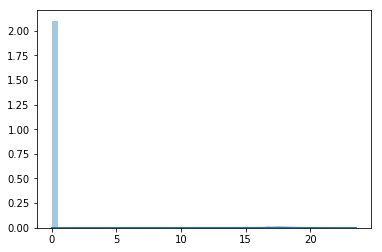

In [148]:
sns.distplot(pred1)
#sns.distplot(y_test)

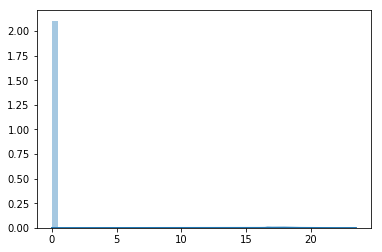

In [101]:
sns.distplot(y_test)

In [93]:
(y_test-pred).sum()

720.566489038709

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
import statsmodels.api as sm

In [ ]:
Xconst = add_constant(X_train)

In [ ]:
model = sm.OLS(y_train,Xconst)
results = model.fit()


In [ ]:
print(results.summary())

In [ ]:
y_train.describe()

In [63]:
print(res.summary())

NameError: name 'res' is not defined

In [ ]:
X.isnull().sum()

In [16]:
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE,chi2
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [112]:
reg = LinearRegression().fit(X_tr_std, y_train)
reg.score(X_te_std, y_test)

0.9220525322807596

In [61]:

vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])

In [62]:
pd.DataFrame(vif.values,X.columns)

,0
visitNumber,1.084147
visitStartTime,0.000029
totals.hits,2.013577
totals.newVisits,1.221587
totals.bounces,1.242775
totals.sessionQualityDim,1.276659
totals.timeOnSite,1.725086
totals.transactions,1.204475
hol,1.023426
device.browserlab,1.119645


In [53]:
(X.corr()[15:20] >0.5).T

,trafficSource.referralPathlab,trafficSource.keywordlab,trafficSource.sourcelab,trafficSource.mediumlab,trafficSource.adContentlab
visitNumber,False,False,False,False,False
visitStartTime,False,False,False,False,False
totals.hits,False,False,False,False,False
totals.newVisits,False,False,False,False,False
totals.bounces,False,False,False,False,False
totals.sessionQualityDim,False,False,False,False,False
totals.timeOnSite,False,False,False,False,False
totals.transactions,False,False,False,False,False
hol,False,False,False,False,False
device.browserlab,False,False,False,False,False


In [73]:
df[df["totals.transactionRevenue"]>0].describe()

,date,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,hol,hol1
count,1.851400e+04,1.851400e+04,18514.000000,1.851400e+04,18514.0,18514.000000,18514.000000,18514.000000,18514.000000,18514.000000,1.851400e+04,1.851400e+04,18514.000000,18514.000000,18514.000000,18514.000000,18514.000000
mean,2.016946e+07,1.496013e+09,4.023064,1.496013e+09,0.0,35.066220,0.393486,26.883926,27.364859,1021.803662,1.428167e+08,1.251132e+08,1.041374,0.964297,0.612888,0.159825,0.144593
std,6.228939e+03,1.558487e+07,12.974430,1.558487e+07,0.0,28.028842,0.488536,19.703868,34.616445,906.694395,6.455644e+08,4.162653e+08,0.392381,0.185553,0.487103,0.366454,0.351700
min,2.016080e+07,1.470046e+09,1.000000,1.470046e+09,0.0,2.000000,0.000000,2.000000,0.000000,0.000000,1.200000e+06,1.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016122e+07,1.481860e+09,1.000000,1.481860e+09,0.0,18.000000,0.000000,15.000000,0.000000,434.250000,2.896000e+07,2.306750e+07,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.017052e+07,1.495567e+09,2.000000,1.495567e+09,0.0,27.000000,0.000000,22.000000,0.000000,749.000000,5.279000e+07,4.606000e+07,1.000000,1.000000,1.000000,0.000000,0.000000
75%,2.017101e+07,1.507904e+09,4.000000,1.507904e+09,0.0,43.000000,1.000000,32.000000,64.000000,1310.000000,1.089675e+08,1.000000e+08,1.000000,1.000000,1.000000,0.000000,0.000000
max,2.018043e+07,1.525148e+09,430.000000,1.525148e+09,0.0,500.000000,1.000000,469.000000,100.000000,15047.000000,4.708206e+10,2.312950e+10,25.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
1507904000

## Running recursive Feature Elimination

In [74]:
20171010

count    1.708337e+06
mean     2.017016e+07
std      6.485620e+03
min      2.016080e+07
25%      2.016122e+07
50%      2.017071e+07
75%      2.017120e+07
max      2.018043e+07
Name: date, dtype: float64

In [ ]:
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
lt=list()

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(Xtrans,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
                
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


In [ ]:
print(rfe.support_,rfe.ranking_)

In [ ]:
X.columns

In [ ]:
X.columns

In [ ]:
X.drop("totals.visits",axis =1,inplace=True)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
y_pred_lr=reg.predict(X_test)

In [113]:
reg = LassoCV(cv=5, random_state=0).fit(X_tr_std, y_train)
reg.score(X_te_std, y_test) 

0.9221357137172833

In [114]:
reg.score(X_tr_std,y_train)

0.8543664969396476

In [96]:
np.unique(y_train,return_counts=True)

(array([ 0.    ,  9.2104, 10.5967, ..., 23.4973, 23.6056, 23.8644]),
 array([1105169,       1,       1, ...,       1,       1,       1]))

In [97]:
1105169/len(y_train)

0.9876

In [89]:
(np.unique(y_test,return_counts=True

589283

In [ ]:
y_pred_la=reg.predict(X_test)

In [ ]:
def Huber(yHat, y, delta=1.):
    return np.where(np.abs(y-yHat) < delta,.5*(y-yHat)**2 , delta*(np.abs(y-yHat)-0.5*delta))

In [ ]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size

In [ ]:
def MAE(true, pred):
    return np.sum(np.abs(true - pred)/ y.size)

In [ ]:
MSE(y_pred_la,y_test)

In [ ]:
MAE(y_pred_la,y_test)

In [ ]:
yp=np.mean(y_pred_la)

In [ ]:
(y_pred_la-yp)/y_pred_la.size

In [ ]:
sns.scatterplot(y_pred_la,(y_pred_la - y_test)**2/y_pred_la.size)

In [ ]:
sns.scatterplot(y_pred_la,np.abs(y_pred_lr-y_test)/ y.size)

In [ ]:
MSE(y_pred_dt,y_test)

In [ ]:
MAE(y_pred_dt,y_test)

In [ ]:
MSE(y_pred_lr,y_test)

In [ ]:
MAE(y_pred_lr,y_test)

In [ ]:
MSE(y_pred_hr,y_test)

In [ ]:
reg.get_params()

In [ ]:
X.columns

In [ ]:
pd.DataFrame(np.round(reg.coef_,5),X.columns)

In [ ]:
pd.DataFrame(np.round(regr.feature_importances_,5))

In [ ]:
rs.fit(Xlasso)
Xlasso=rs.transform(Xlasso)

In [ ]:
yhat=reg.predict(X)

In [ ]:
X.corr()

In [155]:
regr = RandomForestRegressor(random_state=0,n_estimators=50,n_jobs=-1,max_depth=5,bootstrap=True)
scores = cross_val_score(regr, X_train, y_train, cv=5)
scores.mean()                               
#regr.fit(X_train, y_train)  

0.9936352637909082

In [146]:
scores

array([0.9908, 0.9956, 0.9938, 0.9955, 0.9936])

In [156]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [122]:
preds=regr.predict(X_tr_std)

In [103]:
from sklearn.metrics import mean_squared_error

In [123]:
mean_squared_error(y_train, preds, multioutput='raw_values')

array([0.0272])

In [157]:
est=regr.estimators_[1]

In [102]:
regr.score(X_te_std,y_test)

0.9983178400849227

In [125]:
regr.feature_importances_

array([0.0000e+00, 0.0000e+00, 2.8269e-04, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 9.9972e-01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00])

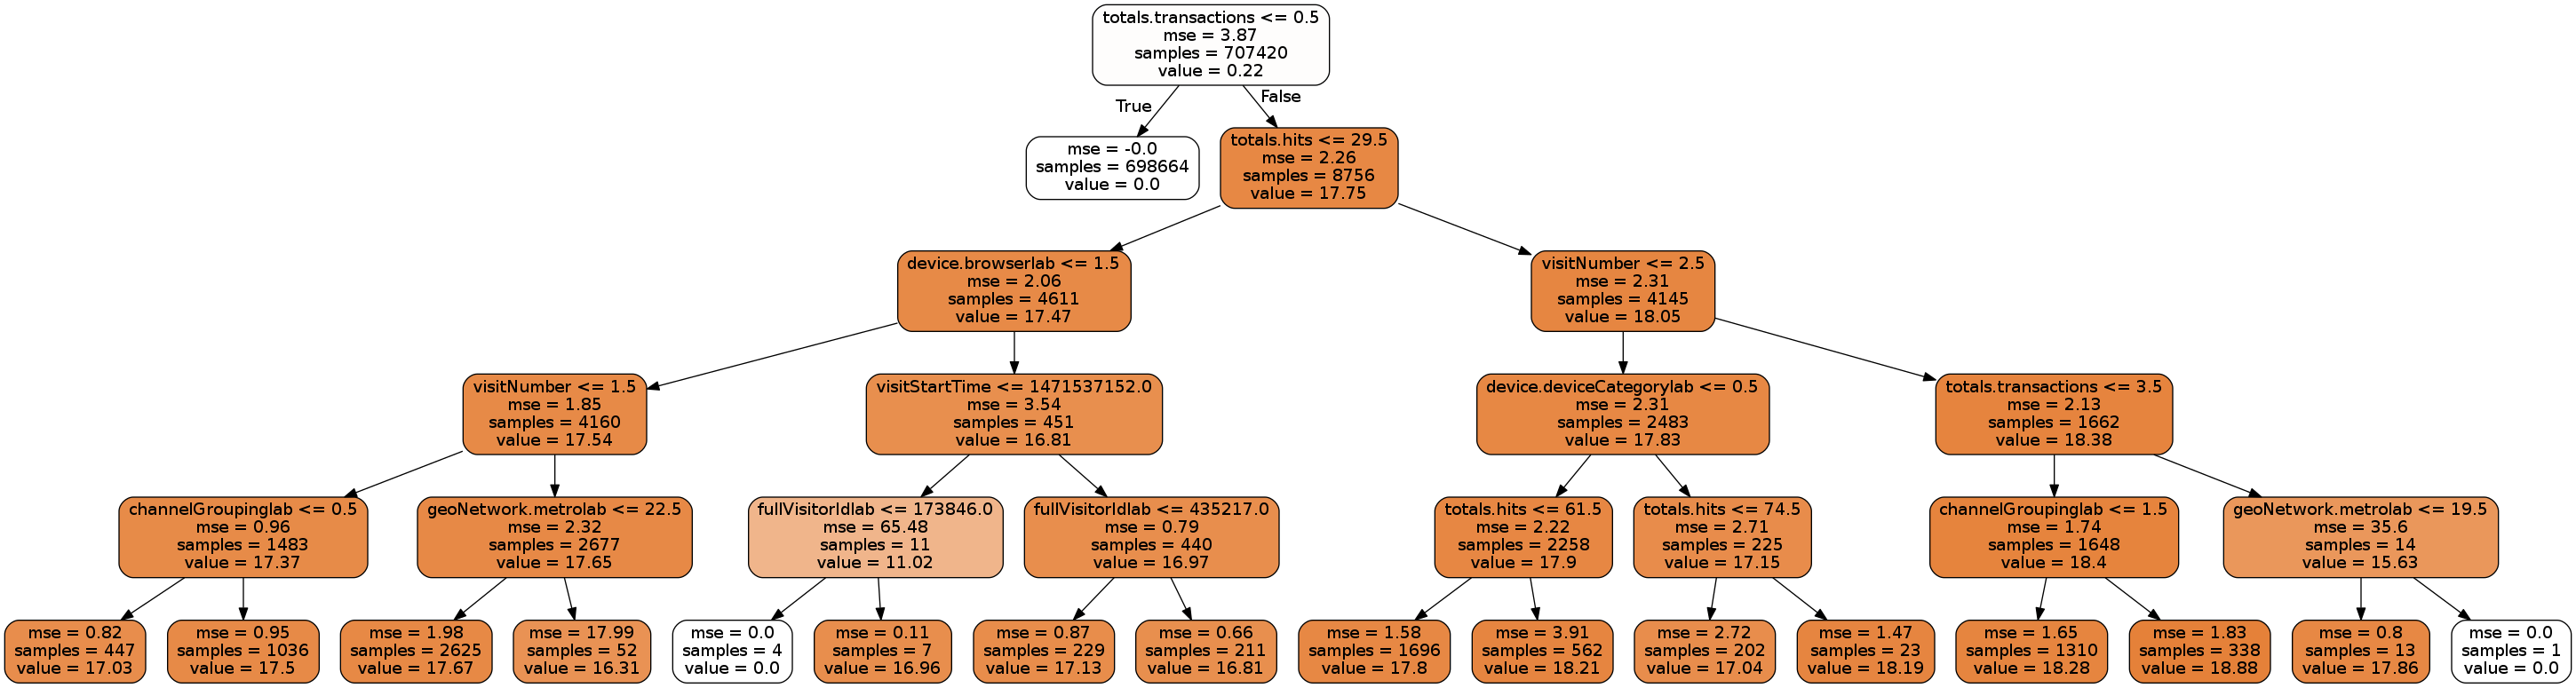

In [158]:
from sklearn.tree import export_graphviz
# Export as dot file
import os
export_graphviz(est, out_file='tree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

os.system('dot -Tpng tree.dot -o tree.png')
# Convert to png using system command (requires Graphviz)


# Display in jupyter notebook
from IPython.display import Image
Image(filename = './tree.png')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=0, loss='lad').fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, est.predict(X_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [5, 6, 8],
    'max_features': [2, 3,4,5,6,7],
    'min_samples_leaf': [10, 100, 1000],
    'n_estimators': [100, 200, 300]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_test,y_test)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.error_score

In [ ]:
grid_search.param_grid

In [ ]:
grid_search.scorer_

In [ ]:
grid_search.verbose

In [ ]:
regr.score(X_test,y_test)

In [ ]:
regr.base_estimator_

In [ ]:
y_pred_dt=regr.predict(X_test)


In [ ]:
pd.DataFrame(regr.feature_importances_,X.columns)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr=ExtraTreesRegressor(n_estimators=1000,max_depth=5,min_samples_leaf=5).fit(X_train,y_train)

In [ ]:
etr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='quantile',alpha=.20).fit(X_train, y_train)

In [ ]:
grad.score(X_test,y_test)

In [ ]:
y_pred=grad.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
pca.fit(Xtrans)  

print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  


In [ ]:
pca = PCA(n_components=14,svd_solver="full")
comp=pca.fit(Xtrans)  
Xcomp=comp.transform(Xtrans)

print(pca.singular_values_) 

In [ ]:
y_train.describe()

In [ ]:
sum(y_test > 0)

In [ ]:
sum(y_train > 0)